# SENTIMENT MODELING PART 2 (VADER,ROBERTA)

The notebook 4a. Classifies using Native Bayes, In this notebook, we are handling the data and feeding it through two NLP techniques: 
1. Vader Scoring
2. Roberta Pretrained NLP models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#adding ntlk for NLP training
import nltk

In [144]:
#we look at the data to make sure that all information is there.
df = pd.read_parquet('data/edmonton_cleaned.parquet', engine='auto')
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",uwPhE21CZLlp1kkSMPvvYw,5OnQqP3q2_9auNdDKpLdsw,3,0,0,0,So much to like about this place--the beautifu...,2012-11-06 23:35:15
1,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",bAy8ROEYO_3aTBhW5LoR4g,7qFH1RkPivVRcwxLwhyixg,4,2,0,1,I'm not a coffee connoisseur so I'm not review...,2013-05-28 23:16:30
2,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",zPDHE7TrXs7EJT06qD8yTA,FLeyjgc05C2V6QI9nVQ48Q,4,0,0,0,"I really loved it here, makes me wish I lived ...",2013-09-04 19:49:33
3,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",84niL3fvJMlFBE2hd2qOVQ,R-c5M0iJkMxxTxIqTQQZ8w,2,1,0,0,The kids who work at Roast are friendly. They...,2013-07-14 21:38:06
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",pLnTjS90gUlsq2tAjI9prA,G3h8pIclwUbuu3itJqF7ug,4,7,0,4,"With a Toast to Roast, I say welcome to the E-...",2012-09-11 23:54:24


In [72]:
def plotter(df):
    #It's plotting time. seaborn style.

    fig , axes = plt.subplots(1,4,figsize = (24,8))
    sns.barplot(data=df, x='stars_y', y= 'pos', ax=axes[0])
    sns.barplot(data=df, x='stars_y', y= 'neg', ax=axes[1])
    sns.barplot(data=df, x='stars_y', y= 'neu', ax=axes[2])
    sns.barplot(data=df, x='stars_y', y= 'compound', ax=axes[3])

    axes[0].set(xlabel='Review Given', ylabel='Positive Classification' )
    axes[1].set(xlabel='Review Given', ylabel='Negative Classification')
    axes[2].set(xlabel='Review Given', ylabel='Neutral Classification')


    axes[0].set_title('Positive Reviews in relation to Stars')
    axes[1].set_title('Negative Reviews in relation to Stars')
    axes[2].set_title('Neutral Reviews in relation to Stars')
    plt.show()
    
#plotter function for models

## 1. VADER model

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for sentiment analysis that is sensitive to both polarity(positive/negative) and intensity (strength) of emotions.

citation:

C. Hutto and E. Gilbert, “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text”, ICWSM, vol. 8, no. 1, pp. 216-225, May 2014.

this kind of uses a bag of words approach:
1. We remove stop words.
2. We score each tokens(words) and combine the total score.

<b>
<p style="color:maroon"> note with this technique, the relationship between words are removed, taking a very important part of the human speech. </p>
</b>

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
#the analyzer object. we can run it on text and see analyzer.

In [7]:
examplepos = "I love this bar! Best place ever yum!"

sia.polarity_scores(examplepos)

#compound score give the compounding value of the sentence. 
#range is from -1 to 1. -1 is very negative, 1 is very positive.

{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.8745}

In [8]:
exampleneg = "disgusting, I would never eat here again. Gross gross gross yuck."
sia.polarity_scores(exampleneg)

{'neg': 0.679, 'neu': 0.321, 'pos': 0.0, 'compound': -0.9136}

In [9]:
exampledf = df['text'][0]
print(exampledf)
print(sia.polarity_scores(exampledf))

So much to like about this place--the beautiful Mercer Building location, the spaciousness, the lovely, friendly baristas. But there are a couple of important cons for me. Biggest being, the music is constant and too loud, ruining everything you go to a coffee shop to do: read, work, reflect, or enjoy a good conversation. When I asked for it to be turned down, they told me they can't--it just plays at one level all the time, and the speakers  are everywhere so you can't get away from it. It sucks.

Secondly, if you're a tea drinker, you're out of luck. They don't serve the tea in pots, but huge, sloppy individual filters--it makes your beverage totally ungainly, hard to drink and is really off putting.

Pros: gluten free goodies and yummy Italian sodas. I'd love to spend more time here, but the music usually drives me out after 10 minutes.
{'neg': 0.055, 'neu': 0.717, 'pos': 0.228, 'compound': 0.9862}


In [10]:
exampledf = df['text'][21]
print(exampledf)
print(sia.polarity_scores(exampledf))

As several other reviewers have observed, this place looks very good. One wants to like it. The management, however, is so clueless that I have decided to permanently give it a pass. There are so many really good places in this area where the management knows how to retain good people that one need not spend time in a place where the servers seem to change on a daily basis.

When I buy high-priced coffee, I like to have it in a real mug, not a cardboard cup that I could get at any fast-food joint. When the people here mistakenly put mine in a cardboard cup, I did not ask for a new coffee. Instead, I politely pointed it out in the hopes that they would get it right the next time. In return, I got an argument and nasty looks from the crew at the counter. Also, no matter now many people they have at the counter, they manage to keep even small groups of customers waiting on long lines.

Yesterday was the kicker. I asked for a decaf coffee and told there was no decaf. Even your average dine

In [151]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
#we keep 30% for testing

In [39]:
#trainer function for the dataframe, returns df with 
def trainerVader(df):
    #creating a dict for the results of pos,neu,negative training.
    res= {}
    for i,row in tqdm(df.iterrows(),total=len(df)):
        text = row['text']
        Bid = row['business_id']
        res[Bid] = sia.polarity_scores(text)
        
    return df

In [40]:
dfscorevaders = trainerVader(train)
# 1 minute on 16 seconds training time on my desktop computer.

  0%|          | 0/47003 [00:00<?, ?it/s]

In [47]:
dfscorevaders = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'business_id'})

In [49]:
dfscorevaders = dfscorevaders.merge(train,how = 'left')

In [50]:
dfscorevaders

,business_id,neg,neu,pos,compound,name,address,city,state,postal_code,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,jZoeTGRfhG9n_Jo6VMqwxw,0.000,0.928,0.072,0.4389,Sushi Wasabi,5714 111 Street NW,Edmonton,AB,T6H 3G1,...,"Restaurants, Sushi Bars, Japanese","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",vvDAxmQDfKiLX8ft5neR1A,bkyer3ffv0wmpAmaukyd1g,4,1,1,1,Fantastic sushi. I have been to this restauran...,2016-08-01 00:02:27
1,jZoeTGRfhG9n_Jo6VMqwxw,0.000,0.928,0.072,0.4389,Sushi Wasabi,5714 111 Street NW,Edmonton,AB,T6H 3G1,...,"Restaurants, Sushi Bars, Japanese","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",FQTb9ZO0ZGF568Z2EBDaEw,gMyac2WN_INQojPmHEZ4Rw,1,0,0,0,Disappointing service. Lost a customer! I want...,2019-02-17 15:21:38
2,jZoeTGRfhG9n_Jo6VMqwxw,0.000,0.928,0.072,0.4389,Sushi Wasabi,5714 111 Street NW,Edmonton,AB,T6H 3G1,...,"Restaurants, Sushi Bars, Japanese","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",4k7_wgETMemLjL2PYv6XiA,0P_wUAKVI8HfKxb4OAHOHA,4,0,0,0,This restaurant is very cute and cozy. It's lo...,2015-02-04 21:23:43
3,jZoeTGRfhG9n_Jo6VMqwxw,0.000,0.928,0.072,0.4389,Sushi Wasabi,5714 111 Street NW,Edmonton,AB,T6H 3G1,...,"Restaurants, Sushi Bars, Japanese","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",rIhVkTJT9w5rCUktjkqAJQ,ACKqVTOTAZylVeuzvcVqhA,5,1,0,0,Great place to have real Japanese food. Nabe u...,2017-02-05 18:02:03
4,jZoeTGRfhG9n_Jo6VMqwxw,0.000,0.928,0.072,0.4389,Sushi Wasabi,5714 111 Street NW,Edmonton,AB,T6H 3G1,...,"Restaurants, Sushi Bars, Japanese","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21...",a6Vrh-CI_XHRlEAYLJ32Mg,hQgWwIjEbn47nN2BIr_LyA,5,1,0,0,Hands down my favorite sushi restaurant in Edm...,2015-05-03 01:05:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46998,P_HGB651eBBjsWRWT9IYjQ,0.000,1.000,0.000,0.0000,Spirits On Jasper,11314 Jasper Avenue NW,Edmonton,AB,T5K 0L8,...,"Food, Beer, Wine & Spirits","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",Lwexr5ScZUv4eQyR_NVu6A,NoB_mtbwrz4aZ2-z5Tpfdg,3,3,5,1,"Spirits on Jasper is my usual liquor store, pu...",2008-11-07 22:40:18
46999,g-Q7m7G3Xrez_Vc2T4wqNQ,0.000,0.586,0.414,0.9339,Namaste India,7626 144th Avenue Nw,Edmonton,AB,T5C 2R7,...,"Gluten-Free, Vegan, Restaurants, Indian","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...",jIlENo45VdokzDR2v5Dp9g,4N6Ge3BYTnLBe7t1A4XGiQ,5,0,0,0,BEST value takeout in Edmonton - the Aloo Gobi...,2019-03-26 23:27:50
47000,0mELPrm26bXmBhdzJezAlQ,0.061,0.764,0.174,0.9502,The Phat Noodle,10347 Jasper Avenue,Edmonton,AB,T5J,...,"Restaurants, Vietnamese","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",WMeVwgPy9mZAfK2GTXv8Kg,GHfmwO7r-XX5fo9vTXmEwA,3,4,0,0,"Having opened recently, decided to give this p...",2012-08-14 17:58:33
47001,0mELPrm26bXmBhdzJezAlQ,0.061,0.764,0.174,0.9502,The Phat Noodle,10347 Jasper Avenue,Edmonton,AB,T5J,...,"Restaurants, Vietnamese","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",y9OZsOB_2T4vDa00QZvm1Q,nXgklazuzxsn_X8DxOJsEg,3,1,0,1,good for quick pit stop on a short lunch break...,2013-04-05 18:56:50


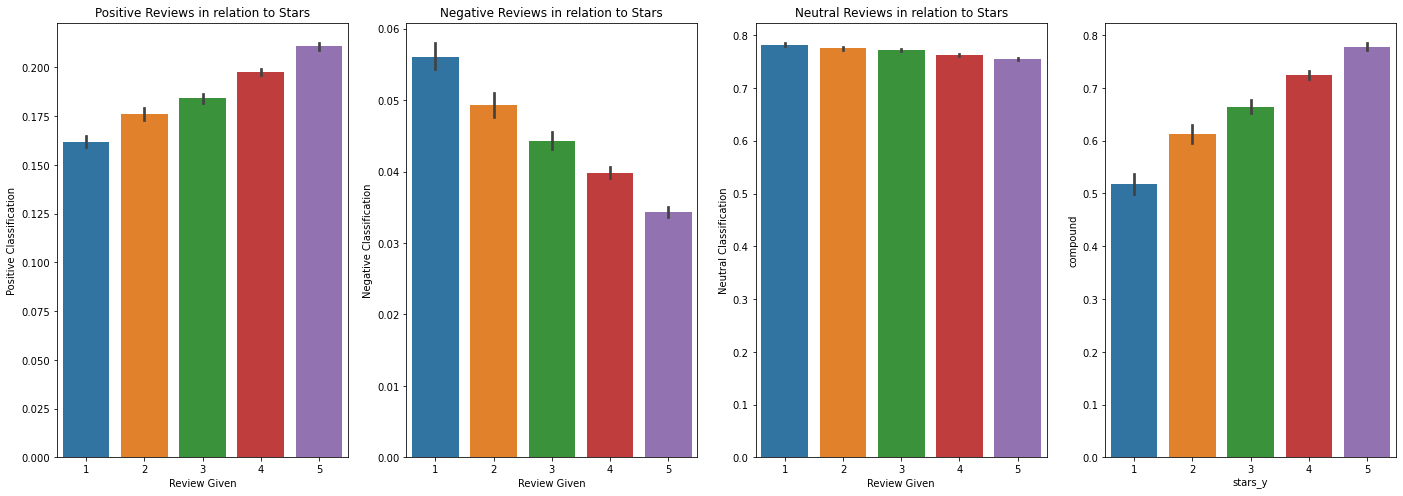

In [73]:
plotter(dfscorevaders)

In [57]:
dfscoreVaderTest = trainerVader(test)

  0%|          | 0/20145 [00:00<?, ?it/s]

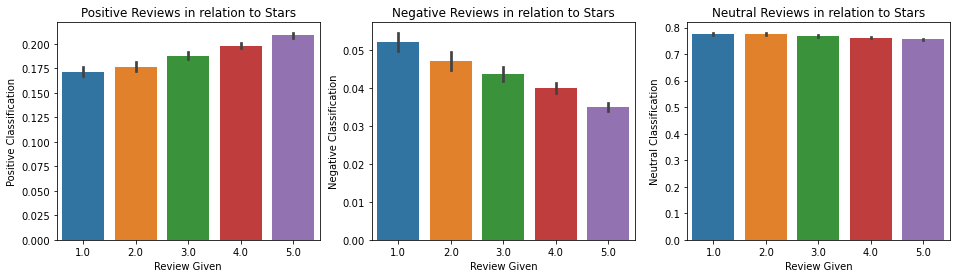

In [62]:
dfscoreVaderTest = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'business_id'})
dfscoreVaderTest = dfscoreVaderTest.merge(test,how = 'left')
plotter(dfscoreVaderTest)

<b><p style="color:blue">Test data agrees with train data, and also classifies properly, with proportionally lower stars the negative sentiment goes up, and positive classification goes up as stars goes up</p></b>

<b><p style="color:maroon">Based on the plots above, looks like negative reviews does make a difference in relation to stars.
    though the positive side, the vader scoring is not as strong of a model with the data on hand</p></b>

## 2. RoBERTa NLP models
RoBERTa: A Robustly Optimized BERT Pretraining Approach

cite: 
arXiv:1907.11692 [cs.CL]
(or arXiv:1907.11692v1 [cs.CL] for this version)
https://doi.org/10.48550/arXiv.1907.11692

These models are researched and links sentiment scoring to related words in the model sentence.

In [52]:
#note: must have transformers installed from hugging-face & pytorch by META AI
#pip install transformers
#pip install torch

In [53]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [54]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

In [55]:
#prints the data to a tensor object.
encoded_sample = tokenizer(examplepos,return_tensors='pt')
outputpos = model(**encoded_sample)
print("example sentence: ", examplepos)
print(outputpos.logits)
#here we can see a tensor object with probability values neg, neutral,positive, with backpropgation for the gradient fn.

example sentence:  I love this bar! Best place ever yum!
tensor([[-1.9768, -1.2123,  4.0664]], grad_fn=<AddmmBackward0>)


In [15]:
#prints the data to a tensor object.
encoded_sample = tokenizer(exampleneg,return_tensors='pt')
outputneg = model(**encoded_sample)
print("example sentence: ", examplepos)
print(outputneg.logits)
#here we can see a tensor object with probability values neg, neutral,positive, with backpropgation for the gradient fn.

example sentence:  I love this bar! Best place ever yum!
tensor([[ 3.1243, -0.8634, -2.4053]], grad_fn=<AddmmBackward0>)


In [16]:
#we convert the tensor object to a numpy for analysis
scorespos = outputpos[0][0].detach().numpy()
scoresneg = outputneg[0][0].detach().numpy()
#adding softmax layer for last part of NN.
scorespos = softmax(scorespos)
scoresneg = softmax(scoresneg)

encoded_sample = tokenizer(exampleneg,return_tensors='pt')
output = model(**encoded_sample)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict_neg = {
    'neg' : scoresneg[0],
    'neu' : scoresneg[1],
    'pos' : scoresneg[2]
}

scores_dict_pos = {
    'neg' : scorespos[0],
    'neu' : scorespos[1],
    'pos' : scorespos[2]
}


print(exampleneg)
print(scores_dict_neg)

print(examplepos)
print(scores_dict_pos)



#here we can see that it is much more accurate than the VADER technique.
#We are now going to put this model on a function for general access.

disgusting, I would never eat here again. Gross gross gross yuck.
{'neg': 0.97798574, 'neu': 0.018133963, 'pos': 0.0038802617}
I love this bar! Best place ever yum!
{'neg': 0.00235627, 'neu': 0.0050610565, 'pos': 0.9925828}


In [17]:
def polarity_score(text):
    
    encoded_text = tokenizer(text,return_tensors='pt', truncation=True, max_length=512)
    #encoded_text = tokenizer(text,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    scores_dict = {
    'neg' : scores[0],
    'neu' : scores[1],
    'pos' : scores[2]
    }
    
    return scores_dict

    

In [18]:
print(train['text'][0])
print(polarity_score(train['text'][0]))

So much to like about this place--the beautiful Mercer Building location, the spaciousness, the lovely, friendly baristas. But there are a couple of important cons for me. Biggest being, the music is constant and too loud, ruining everything you go to a coffee shop to do: read, work, reflect, or enjoy a good conversation. When I asked for it to be turned down, they told me they can't--it just plays at one level all the time, and the speakers  are everywhere so you can't get away from it. It sucks.

Secondly, if you're a tea drinker, you're out of luck. They don't serve the tea in pots, but huge, sloppy individual filters--it makes your beverage totally ungainly, hard to drink and is really off putting.

Pros: gluten free goodies and yummy Italian sodas. I'd love to spend more time here, but the music usually drives me out after 10 minutes.
{'neg': 0.70344096, 'neu': 0.20645857, 'pos': 0.090100564}


In [148]:
print(train['text'][49221])
print(polarity_score(train['text'][49221]))

When you think of pretzels you likely think of the little hard kind that come in a bag (kinda like chips) or the ones that hang in those spinner machines (covered in salt) at sporting events. Unfortunately in Canada, that's generally the extent of our pretzel experience. Thankfully Zwick's is on the scene to forever change Edmonton's severely lacking pretzel scene. It's something that you didn't even know that you needed. (But you absolutely do!) They were even featured on Big Food Bucket List in season two!

You'll find Zwick's in Westmount (in a small area that is particularly packed with amazing food) and you'll spot their tiny location when you see their turquoise signage. The space is very small and there isn't much to it. The walls are painted with black chalkboard paint, turning almost every inch of wall space into the menu. (Whoever writes the menu has very nice printing!) There's a large communal table that takes up the rest of the tiny space, which makes it possible to eat-in

In [ ]:
res= {}
for i,row in tqdm(train.iterrows(),total=len(train)):
    text = row['text']
    Bid = row['business_id']
    res[Bid] = polarity_score(text)
#the data was cut to 75% to lessen load times, data was ran through RoBERTa model for 3&1/2 hours spitting out sentiment scores.

In [23]:
dfscoreBert.to_parquet('data/edmonton_trained.parquet')

In [25]:
dfscoreBert = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'business_id'})
dfscoreBert = dfscoreBert.merge(train,how = 'left')

dfscoreBert.to_csv('data/trained-data.csv')

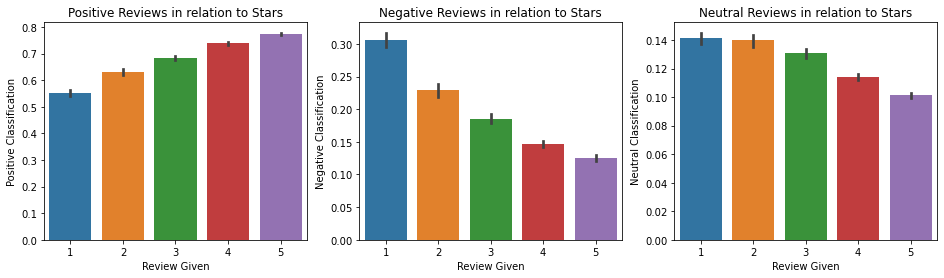

In [28]:
plotter(dfscoreBert)

In [ ]:
traineddata = dfscoreBert.groupby(["business_id","name","latitude","longitude"])["pos"].mean().reset_index()

traineddata.to_csv('data/trained-groupbyAVGpos-data.csv')

## INTERACTIVE MAP OF AVERAGE POSITIVE SENTIMENTS OF RESTAURANTS IN EDMONTON

[map of edmonton with positively rated restaurants](https://datastudio.google.com/s/ulcwcPpFe0w)

## RoBERTa results vs Vader Results